# Average Brightness Feature Extraction
The dataset I am using has 200 RGB colour images, with 120 each for training and 80 each for testing.<br>
<br>
Here I will build a classifier to accurately label images as either day or night, relying on finding distinguishing
feature between the two types.
### Import resources

In [25]:
import os
import glob

import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Loading the testing and training data
### Define load_dataset function

In [9]:
def load_dataset(dir_name):
    img_classes = glob.glob(os.path.join(dir_name, '*', ''))
    img_list = []
    
    for img_class in img_classes:
        imgs = glob.glob(os.path.join(img_class, '*'))
        
        for img in imgs:
            if img is not None:
                img = mpimg.imread(img)
                img_list.append((img, img_class[len(dir_name):-1]))
                
    return img_list

### Load the datasets

In [10]:
train_dir = 'data/train/'
test_dir = 'data/test/'

train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)

# Pre-processing the data
After loading the data, I need to pre-process it.

### Standardise function
This function will take an image-label pair list and will output a standardised version, with re-sized images and 
int labels.

In [11]:
def standardise(img_list):
    std_list = []
    
    for img in img_list:
        image = img[0]
        label = img[1]
        
        std_image = cv2.resize(image, (1100, 600))
        std_label = 0 if label=="night" else 1
        
        std_list.append((std_image, std_label))
    
    return std_list

### Visualise some standardised data

Shape:  (600, 1100, 3)
Label:  1


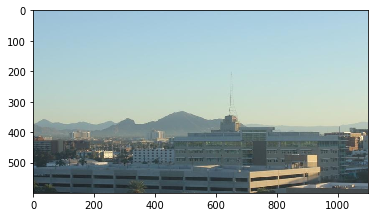

In [21]:
std_train_data = standardise(train_data)

selected_image = std_train_data[0]
image = selected_image[0]
label = selected_image[1]

print('Shape: ', image.shape)
print('Label: ', label)
plt.imshow(image)

## Feature Extraction
The feature extracted will be the brightness of the image.
I will be calculating the average brightness using HSV colorspace.
### RGB to HSV

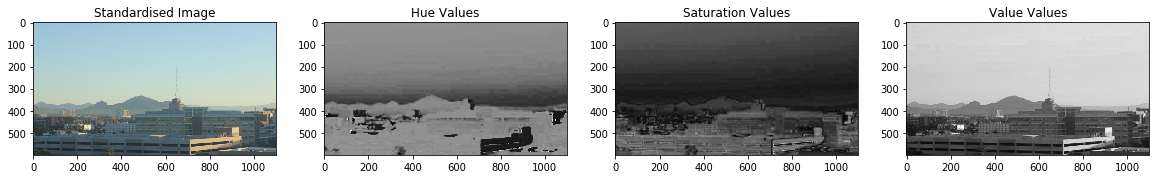

In [22]:
selected_image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

hue = selected_image_hsv[:, :, 0]
saturation = selected_image_hsv[:, :, 1]
value = selected_image_hsv[:, :, 2]

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
ax1.set_title("Standardised Image")
ax1.imshow(image, cmap='gray')
ax2.set_title("Hue Values")
ax2.imshow(hue, cmap='gray')
ax3.set_title("Saturation Values")
ax3.imshow(saturation, cmap='gray')
ax4.set_title("Value Values")
ax4.imshow(value, cmap='gray')

### Find average brightness

In [23]:
def avg_brightness(rgb_image):
    
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    value = hsv_image[:,:,2]
    
    avg_value = np.sum(value)
    area = rgb_image.shape[0]*rgb_image.shape[1]
    
    return avg_value/area

Shape:  (372, 640, 3)
Label:  day
Brightness:  143.51


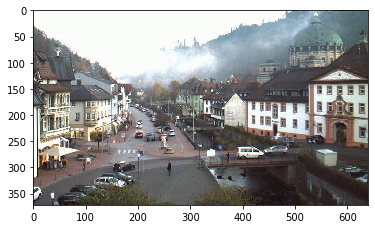

In [33]:
# Visualise some data and display its average brightness
image_number = 100

selected_image = train_data[image_number]
image = selected_image[0]
label = selected_image[1]
brightness = round(avg_brightness(image), 2)

print('Shape: ', image.shape)
print('Label: ', label)
print('Brightness: ', brightness)
plt.imshow(image)
